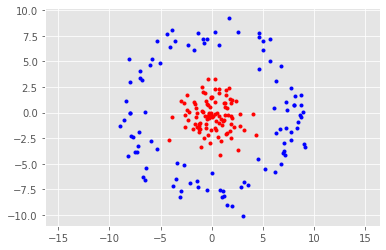

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')
import numpy as np
N=200
n=N//2
#polar coordinate
r1=8+np.random.randn(n)
theta1=np.random.rand(n)*2.0*np.pi

r2=2+np.random.randn(n)
theta2=np.random.rand(n)*2.0*np.pi

x1=np.concatenate( (r1*np.cos(theta1), r2*np.cos(theta2)))
x2=np.concatenate( (r1*np.sin(theta1), r2*np.sin(theta2)))

x=np.stack((x1,x2), axis = 1)
yt=np.ones( (2*n,1))
yt[n:]=-1
plt.axis('equal')
plt.plot(x[:,0][(yt==1)[:,0]],x[:,1][(yt==1)[:,0]],'.b')
plt.plot(x[:,0][(yt==-1)[:,0]],x[:,1][(yt==-1)[:,0]],'.r')

In [2]:
w0=np.random.randn(2,3)
b0=0
w1=np.random.randn(3,1)
b1=0

a0=x
z0=np.einsum('ik,kj',a0,w0)+b0
f0=np.tanh(z0)

a1=f0
z1=np.einsum('ik,kj',a1,w1)+b1
f1=np.tanh(z1)

yp=f1


In [3]:
yp.shape

(200, 1)

$\begin{eqnarray*}
\frac{\partial L}{\partial b1} &=&\frac{\partial L}{\partial yp}\frac{\partial yp}{\partial f1}
\frac{\partial f1}{\partial z1}\frac{\partial z1}{\partial b1}\\
&=&(yp-yt)(1)(1-f1^2)(1)
\end{eqnarray*}$

$\begin{eqnarray*}
\frac{\partial L}{\partial w1} &=&\frac{\partial L}{\partial yp}\frac{\partial yp}{\partial f1}
\frac{\partial f1}{\partial z1}\frac{\partial z1}{\partial w1}\\
&=&(yp-yt)(1)(1-f1^2)(a1)
\end{eqnarray*}$

$\begin{eqnarray*}
\frac{\partial L}{\partial b0} &=&\frac{\partial L}{\partial yp}\frac{\partial yp}{\partial f1}
\frac{\partial f1}{\partial z1}\frac{\partial z1}{\partial a1}\frac{\partial a1}{\partial f0}
\frac{\partial f0}{\partial z0}\frac{\partial z0}{\partial b0}
\\
&=&(yp-yt)(1)
(1-f1^2)(w1)(1)
(1-f0^2)(1)
\end{eqnarray*}$

$\begin{eqnarray*}
\frac{\partial L}{\partial b0} &=&\frac{\partial L}{\partial yp}\frac{\partial yp}{\partial f1}
\frac{\partial f1}{\partial z1}\frac{\partial z1}{\partial a1}\frac{\partial a1}{\partial f0}
\frac{\partial f0}{\partial z0}\frac{\partial z0}{\partial w0}
\\
&=&(yp-yt)(1)
(1-f1^2)(w1)(1)
(1-f0^2)(x)
\end{eqnarray*}$

In [4]:
dLdb1=np.einsum('Ni->i',(yp-yt)*(1-f1*f1))
dLdb1

array([14.90201478])

In [5]:
dLdw1=np.einsum('Ni,Nj->ji',(yp-yt)*(1-f1*f1), a1)
dLdw1

array([[ 50.73823924],
       [-23.38083707],
       [ 25.7208772 ]])

In [6]:
dz1da1=np.einsum('Ni,ji->Nj', (yp-yt)*(1-f1*f1), w1)
dLdb0=np.einsum('Ni->i', dz1da1*(1)*(1-f0*f0) )
dLdb0

array([ 38.43234104,  -4.63645673, -15.34392706])

In [7]:
dz1da1=np.einsum('Ni,ji->Nj', (yp-yt)*(1-f1*f1), w1)
dLdw0=np.einsum('Ni,Nj->ji', dz1da1*(1)*(1-f0*f0),a0 )
dLdw0

array([[-16.17029481,   2.06365691,   8.0058757 ],
       [ -5.49755304,   0.51889805,   6.54809809]])

In [8]:
w0=np.random.randn(2,3)
b0=np.random.randn(1)
w1=np.random.randn(3,1)
b1=np.random.randn(1)


m=10000
alpha=0.001
for i in range(m):
    #forward
    a0=x
    z0=np.einsum('ik,kj',a0,w0)+b0
    f0=np.tanh(z0)
    a1=f0
    z1=np.einsum('ik,kj',a1,w1)+b1
    f1=np.tanh(z1)
    yp=f1
    L=0.5*np.average((yp-yt)*(yp-yt))
    if i%(m//10)==0:
        print("Loss: %s"%L)
        #print(" w0:%s, b0:%s, w1:%s, b1:%s "%(w0,b0,w1,b1) )
        
    #back propagation
    dLdb1=np.einsum('Ni->i',(yp-yt)*(1-f1*f1))
    dLdw1=np.einsum('Ni,Nj->ji',(yp-yt)*(1-f1*f1), a1)
    dz1da1=np.einsum('Ni,ji->Nj', (yp-yt)*(1-f1*f1), w1)
    dLdb0=np.einsum('Ni->i', dz1da1*(1)*(1-f0*f0) )
    dLdw0=np.einsum('Ni,Nj->ji', dz1da1*(1)*(1-f0*f0),a0 )
    
    b1=b1-alpha*dLdb1
    w1=w1-alpha*dLdw1
    b0=b0-alpha*dLdb0
    w0=w0-alpha*dLdw0

Loss: 0.760594772006472
Loss: 0.01014560571544706
Loss: 0.005392935762879041
Loss: 0.003737243811134204
Loss: 0.002884240692692318
Loss: 0.0023555246582922375
Loss: 0.0019932692387961814
Loss: 0.0017286350526669282
Loss: 0.0015264509852788578
Loss: 0.0013667567445429013


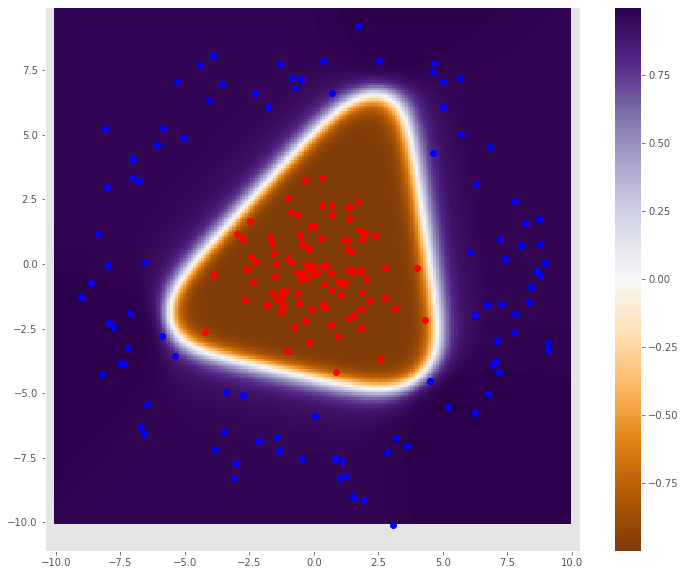

In [9]:
my,mx=np.mgrid[slice(-10,10,0.1),slice(-10,10,0.1)]
out=np.zeros(mx.shape)
for i in range(mx.shape[0]):
    for j in range(mx.shape[1]):
        u=[[ mx[i,j], my[i,j]]]
        #forward
        a0=u
        z0=np.einsum('ik,kj',a0,w0)+b0
        f0=np.tanh(z0)
        a1=f0
        z1=np.einsum('ik,kj',a1,w1)+b1
        f1=np.tanh(z1)
        yp=f1
        out[i,j]=yp
plt.figure(figsize=(12,10))
plt.pcolor(mx,my,out,cmap=cm.PuOr)
plt.colorbar()
plt.axis('equal')
plt.plot(x1[(yt==1)[:,0]],x2[(yt==1)[:,0]],'ob')
plt.plot(x1[(yt==-1)[:,0]],x2[(yt==-1)[:,0]],'or')